In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

## 1. Loading and Saving Images

In [83]:
# Accessing and Modifying pixel values
# loads an image
image = cv2.imread('../img/beach.png') # OpenCV reads images in as B, G, R 
image = np.flip(image, axis = 2) # to Re-order channels as R, G, B for matplotlib renderer
# It returns a tuple of number of rows, columns and channels (if image is color)
image.shape

(475, 600, 3)

In [84]:
image[:,:,1]

array([[ 85,  84,  85, ...,  70,  70,  71],
       [ 85,  85,  85, ...,  72,  71,  71],
       [ 86,  87,  87, ...,  72,  72,  72],
       ...,
       [154, 150, 150, ..., 144, 101,  66],
       [151, 148, 149, ...,  48,  33,  39],
       [155, 169, 174, ...,  92,  73,  48]], dtype=uint8)

In [85]:
def show_image(image, cmap = None, fig_size = (10, 10)):
    fig, ax = plt.subplots(figsize=fig_size)
    ax.imshow(image, cmap = cmap)
    ax.axis('on')
    plt.show()

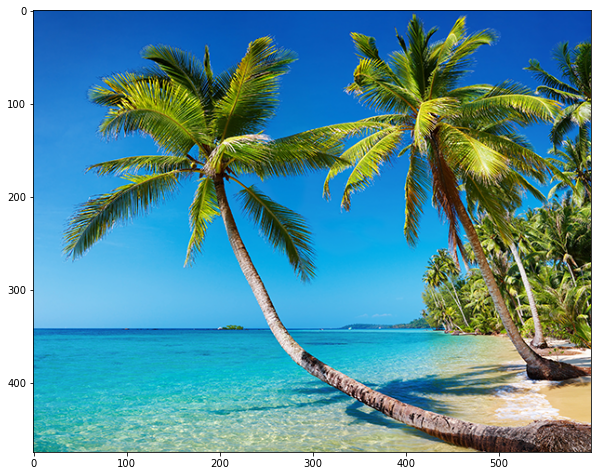

In [86]:
show_image(image)

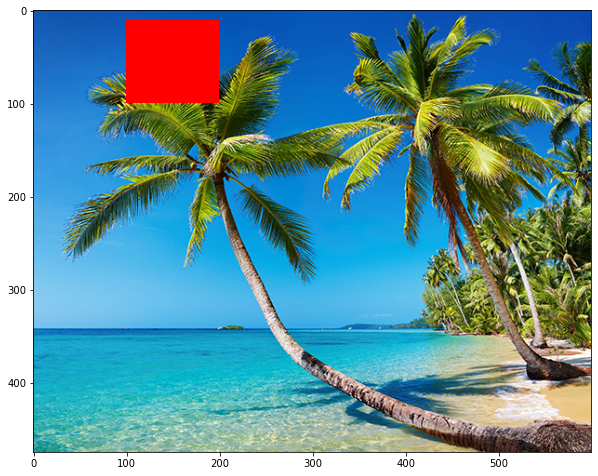

In [87]:
# accessing image section and converting it to white
image[10:100, 100:200] = [255, 0, 0]
show_image(image)

In [20]:
cv2.imwrite('edited.png', image) # Remember OpenCV operations expect images to be in the format # B, G, R

True

### EXERCISE: Load an image using CV2 and use `show_image()` function to show it

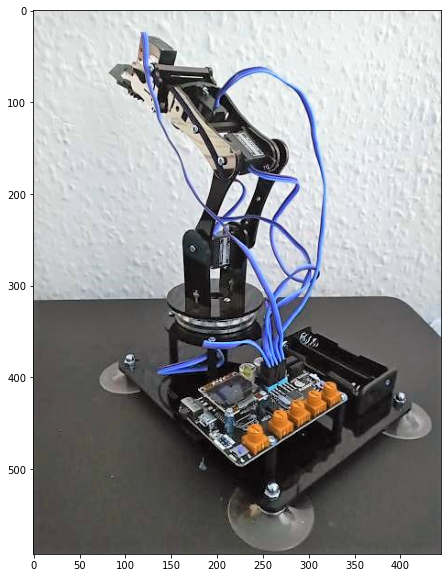

In [24]:
# TODO: What happens if we don't flip the image channels before showing it using matplotlib?
image = cv2.imread('../img/robotic_arm.jpg')
#Answer: If we do not flip the image before using matplotlib,
#the image will be displayed as B, R, G instead of R, G, B

show_image(image)

### EXERCISE: Load an image using CV2, draw a white rectangle on it then save it to disk using CV2

In [90]:
def display_image(image, cmap = None, fig_size = (10, 10)):
    fig, ax = plt.subplots(figsize=fig_size)
    ax.imshow(image, cmap = cmap)
    ax.axis('on')
    plt.show()

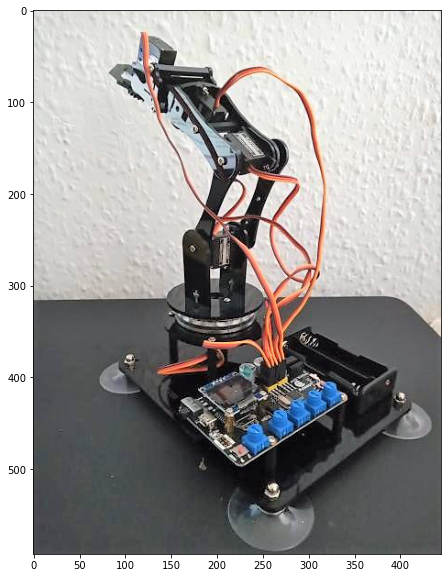

In [93]:
#Load image
image = cv2.imread('../img/robotic_arm.jpg')
image = np.flip(image, axis = 2)
image.shape

display_image(image)

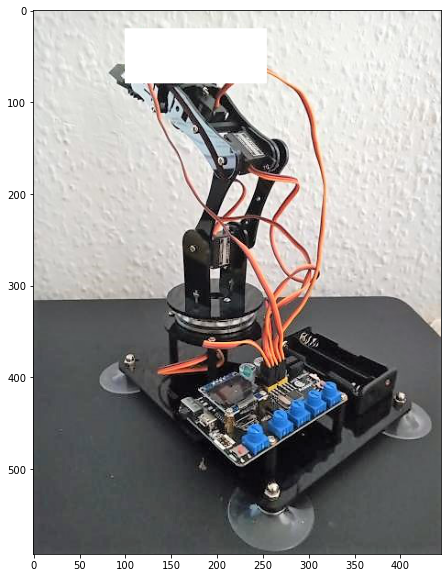

In [94]:
# TODO: Write your code below
image[20:80, 100:255] = [255, 255, 255]
cv2.imwrite('./edited_robot.png', image)
display_image(image)

## 2. Colour Channels

### 2.1 Order of Colour Channels

In [80]:
shapes_image = "../img/beach.png"

In [81]:
# reads image using matplotlib
shapes_matpotlib = plt.imread(shapes_image) # R, G, B

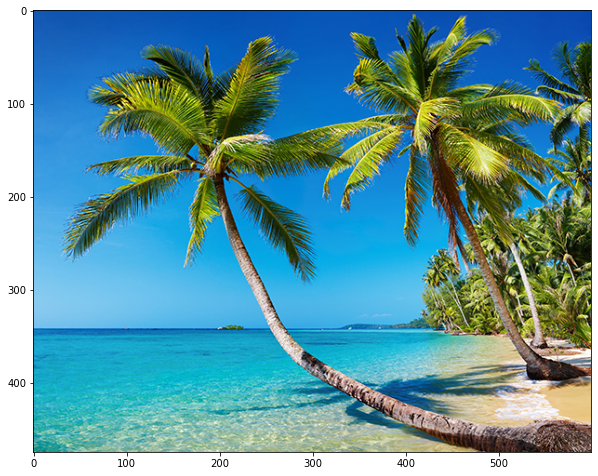

In [82]:
show_image(shapes_matpotlib)

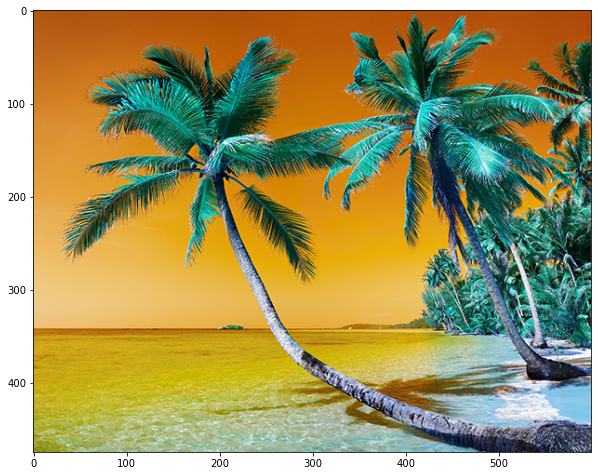

In [50]:
# The order of colour channels read in is important - Notice the colour changes
shapes_cv2 = cv2.imread(shapes_image)
show_image(shapes_cv2)

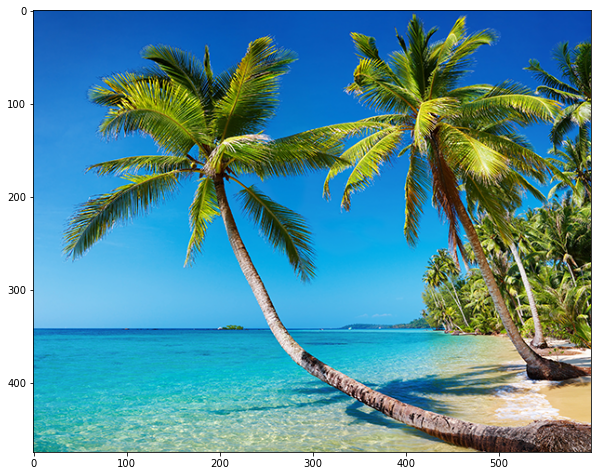

In [51]:
show_image(np.flip(shapes_cv2, axis = 2))

### 2.2 Flipping matrices with numpy

In [54]:
x = np.array([[[1,2, 3], [2, 3, 4], [3, 4, 5]], 
                  [[1,2, 3], [2, 3, 4], [3, 4, 6]], 
                  [[1,2, 3], [2, 3, 4], [3, 4, 7]]])
x

array([[[1, 2, 3],
        [2, 3, 4],
        [3, 4, 5]],

       [[1, 2, 3],
        [2, 3, 4],
        [3, 4, 6]],

       [[1, 2, 3],
        [2, 3, 4],
        [3, 4, 7]]])

In [59]:
x.shape
#(H, W, C) -> (C, W, H)

(3, 3, 3)

In [55]:
np.flip(x, axis =0 )

array([[[1, 2, 3],
        [2, 3, 4],
        [3, 4, 7]],

       [[1, 2, 3],
        [2, 3, 4],
        [3, 4, 6]],

       [[1, 2, 3],
        [2, 3, 4],
        [3, 4, 5]]])

In [56]:
np.flip(x, axis =1 )
#flip bottom pixels with pixels at position 0
# B, G, R

array([[[3, 4, 5],
        [2, 3, 4],
        [1, 2, 3]],

       [[3, 4, 6],
        [2, 3, 4],
        [1, 2, 3]],

       [[3, 4, 7],
        [2, 3, 4],
        [1, 2, 3]]])

In [57]:
np.flip(x, axis =2 )
# flip vertical axis with horizontal axis
# take red and switch with blue => RGB

array([[[3, 2, 1],
        [4, 3, 2],
        [5, 4, 3]],

       [[3, 2, 1],
        [4, 3, 2],
        [6, 4, 3]],

       [[3, 2, 1],
        [4, 3, 2],
        [7, 4, 3]]])

### 2.3 Splitting colour channels with matplotlib

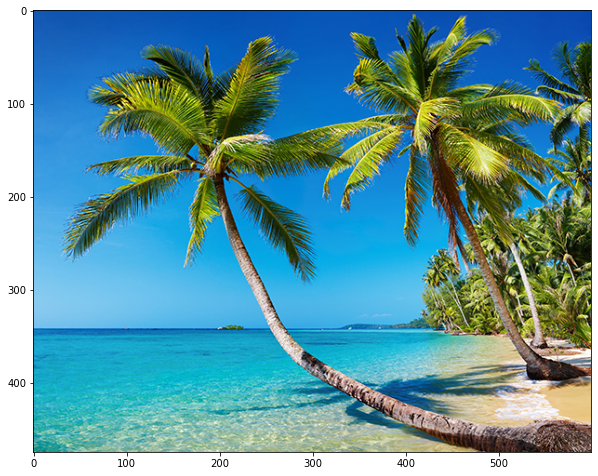

Red


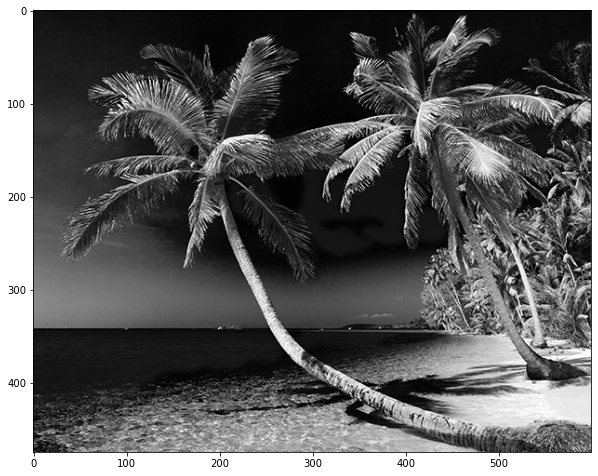

Green


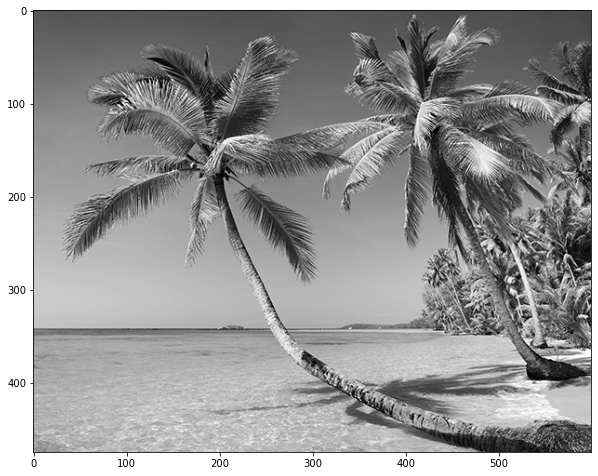

Blue


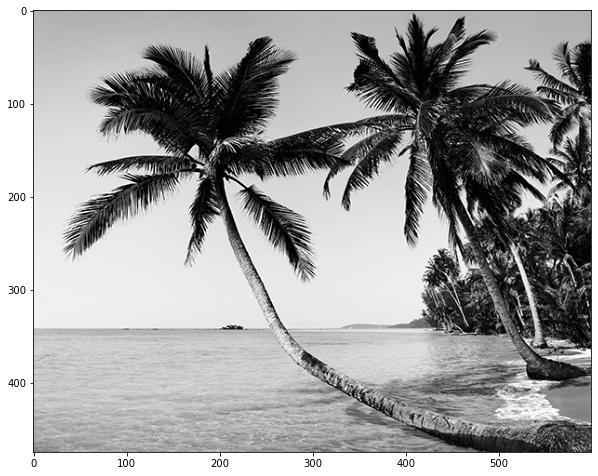

In [60]:
image = plt.imread('../img/beach.png')
show_image(image)
channels_matplotlib = [image[:, : , i] for i in range(3)]
names = ['Red', 'Green', 'Blue']
for name, channel in zip(names, channels_matplotlib):
    print(name)
    show_image(channel, cmap='gray')
    # we splitted the colour channel that is why it is black and white

### 2.4 Splitting colour channels with CV2

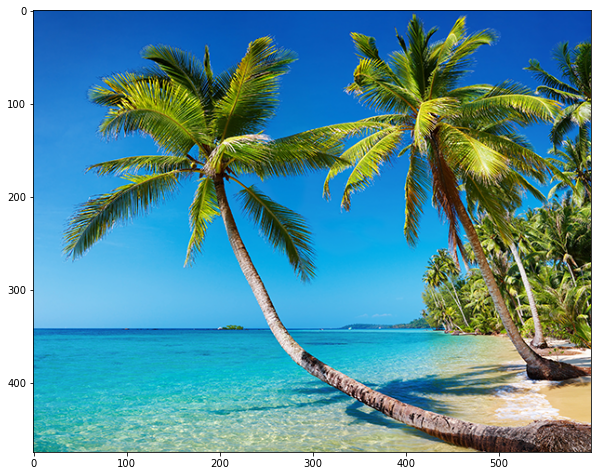

Red


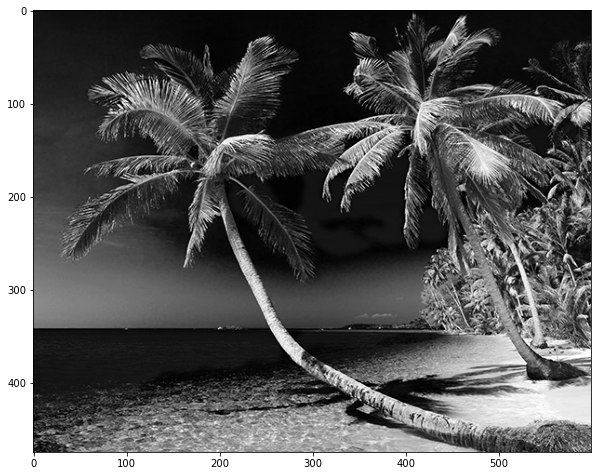

Green


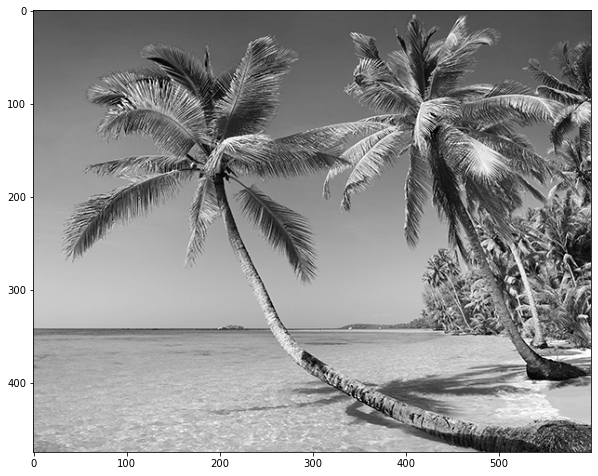

Blue


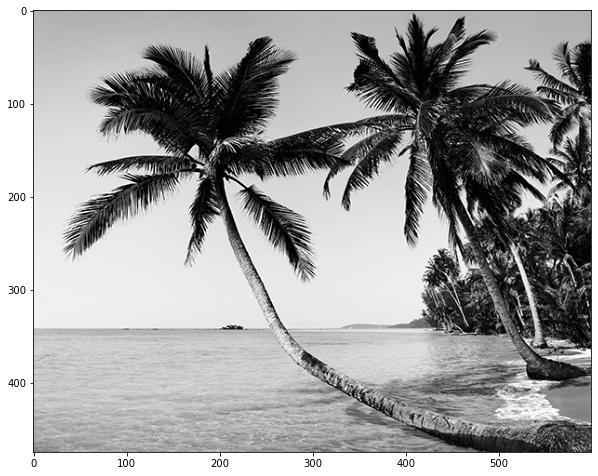

In [61]:
image = cv2.imread('../img/beach.png') # B, G, R -> this order is required for showing images with cv2.imshow().
image = np.flip(image, axis = 2) # R, G, B -> This order is required for showing images with plt.imshow().
show_image(image)
cv2_channels = cv2.split(image)
for name, channel in zip(names, cv2_channels):
    print(name)
    show_image(channel, cmap='gray')

### EXERCISE: Write a script that uses argument parser to load, crop and display an image with CV2 then saves it into a file

In [ ]:
# Your code below
import argparse
import cv2
import numpy as np
import os
import matplotlib.pyplot as plt
%matplotlib inline

def saving_image(image, output):
    #save your image to output path using opencv
    path = output
    cv2.imwrite(os.path.join(path,'crop_image.jpg'), image)
    cv2.waitKey(0)

ap = argparse.ArgumentParser()
ap.add_argument('-i', '--image', required=True, help = 'Use -i flag with path to image as argument')
ap.add_argument('-s', '--save', required=True, help = 'Use -s flag with path to output as argument')
args = vars(ap.parse_args())

# Loading an image
image = cv2.imread(args["image"]) #B R G
cv2.imshow('Input', image)
cv2.waitKey(0) # to see a still image until you press something


# crop image
crop_image = image[100:1000, 10:500].copy()
cv2.imshow('Output', crop_image) # B R G input  
cv2.waitKey(0) # to see a still image until you press something
saving_image(crop_image, args["save"])

In [ ]:
# %load ../solutions/parsing_commands.py

### Homework 1: Write a function that reads in an image using either the matplotlib or CV2 and shows it in this notebook using matplotlib 

In [88]:
# TODO: Write your code below
def read_and_show(path, cmap = None, fig_size = (10, 10)):
    # read an image using opencv
    image = cv2.imread(path) # B R G
    # show image using matplotlib, flip it first
    image = np.flip(image, axis = 2)
    image.shape
    fig, ax = plt.subplots(figsize =fig_size)
    ax.imshow(image, cmap = cmap)
    ax.axis('on')
    plt.show()


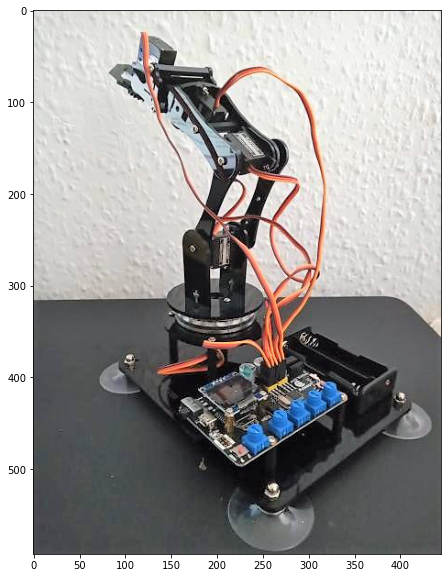

In [89]:
# test
read_and_show('../img/robotic_arm.jpg')

In [ ]:
# This is Simonetta Ifeji Notebook 1